Installing Libraries

In [9]:
!pip install pandas
!pip install numpy matplotlib seaborn
!pip install scikit-learn
!pip install plotly
!pip install nbformat --upgrade

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

Load Dataset

In [91]:
# Load the dataset
file_path = "data.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check Data Outliers, missing values, imbalance and normalization 

In [92]:
# Veiwing current Data Outliers
num_features = len(data.columns)
rows = (num_features // 5) + 1  # 5 columns per row

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# Checking For Classes imbalance!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Check column Data types
print("\nDataset Information:")
data.info()



Missing Values in Each Column:
Series([], dtype: int64)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  t

In [93]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Map the 'diagnosis' column to binary labels
true_labels = data['diagnosis'].map({'B': 0, 'M': 1}).to_numpy()

# Drop non-numeric columns (id, diagnosis)
if 'id' in data.columns:
    data = data.drop(columns=['id'])
if 'diagnosis' in data.columns:
    data = data.drop(columns=['diagnosis'])

# If there are missing values, fill missing values with the mean
data = data.fillna(data.mean())

# Handle Outliers: Remove them (based on a threshold, e.g., 1.5 times the interquartile range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[mask]  # Retain only rows without outliers
true_labels = true_labels[mask.to_numpy()]  # Update true_labels to match retained rows

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame for easier handling
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Print the shape of true_labels and data_scaled
print("Shape of true_labels:", true_labels.shape)
print("Shape of data_scaled:", data_scaled.shape)


Shape of true_labels: (398,)
Shape of data_scaled: (398, 30)


## Experiment 1 : Clustering without PCA

In [26]:
def kmeans(data, k, max_iter=100):
    # Step 1: Randomly initialize centroids
    np.random.seed(42)
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[random_indices]
    
    for i in range(max_iter):
        # Step 2: Assign points to nearest centroid
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Step 3: Recalculate centroids
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    # Compute SSE
    sse = np.sum((data - centroids[labels]) ** 2)
    return labels, centroids, sse

# Example: Cluster into 3 clusters
labels, centroids, sse = kmeans(data_scaled.values, k=3)
print(f"SSE: {sse}")

SSE: 7268.018136439987


 Tunning the parameter k

k: 1, SSE: 11939.999999999998
k: 2, SSE: 8342.53983627073
k: 3, SSE: 7268.018136439987
k: 4, SSE: 6621.790370366547
k: 5, SSE: 6222.582208718649
k: 6, SSE: 5910.093260031674
k: 7, SSE: 5724.158082043086
k: 8, SSE: 5485.9929449948995
k: 9, SSE: 5068.010951397
k: 10, SSE: 4914.402941906885
Best k: 10 with SSE: 4914.402941906885


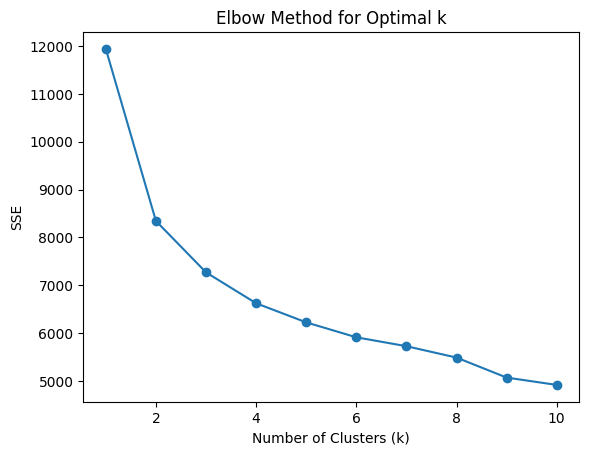

In [55]:
# Grid search over k
def tune_k(data, k_values, max_iter=100):
    results = []
    for k in k_values:
        _, _, sse = kmeans(data, k, max_iter)
        results.append((k, sse))
        print(f"k: {k}, SSE: {sse}")
    return results

# Define the range of k values to test
k_values = range(1, 11)  # Test k from 1 to 10

# Perform grid search
results = tune_k(data_scaled.values, k_values)

# Find the best k
best_k, best_sse = min(results, key=lambda x: x[1])
print(f"Best k: {best_k} with SSE: {best_sse}")

# Plot the results (optional)
import matplotlib.pyplot as plt
k_values, sse_values = zip(*results)
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

increasing the "k" parameter reduces the error but on the other hand increses overfitting. also, the classification becomes less interpratable as k increases.

 Visiualizing the clusters

In [56]:
def visualize_clusters(data, labels, title, centroids=None):
    plt.figure(figsize=(8, 5))
    
    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    
    # If centroids are provided, plot them as well
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()


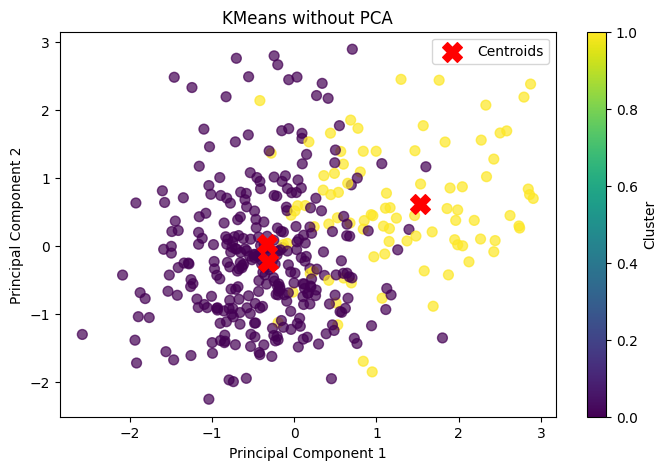

In [57]:
visualize_clusters(data_scaled.values,labels,"KMeans without PCA",centroids=centroids)

## Experiment 2 : Implementing PCA

In [58]:
def pca(data, n_components):
    # Step 1: Compute the covariance matrix
    cov_matrix = np.cov(data.T)

    
    # Step 2: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 3: Sort eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 4: Select the top n_components
    top_eigenvectors = eigenvectors[:, :n_components]
    
    # Step 5: Project the data
    reduced_data = np.dot(data, top_eigenvectors)
    return reduced_data, eigenvalues, eigenvectors

# Example: Reduce to 2 components
reduced_data, eigenvalues, eigenvectors = pca(data_scaled.values, n_components=2)
print(reduced_data[:5])


[[-5.92706678  3.50541662]
 [-5.15701236 -4.1752157 ]
 [-1.17301257  3.40849842]
 [-6.36932678 -0.73928499]
 [-2.78679715  0.66664918]]


Implementing Elbow Method
 - iterating KMeans with various k values and choosing according to elbow method

k: 1, SSE: 7311.0927790539245
k: 2, SSE: 3721.2368153789084
k: 3, SSE: 2688.9513662313548
k: 4, SSE: 2179.8565615716593
k: 5, SSE: 1637.1853881796244
k: 6, SSE: 1382.399890198852
k: 7, SSE: 1210.407084722845
k: 8, SSE: 1106.0452414206325
k: 9, SSE: 993.3622530996448
k: 10, SSE: 871.4538225821609
Best k: 10 with SSE: 871.4538225821609


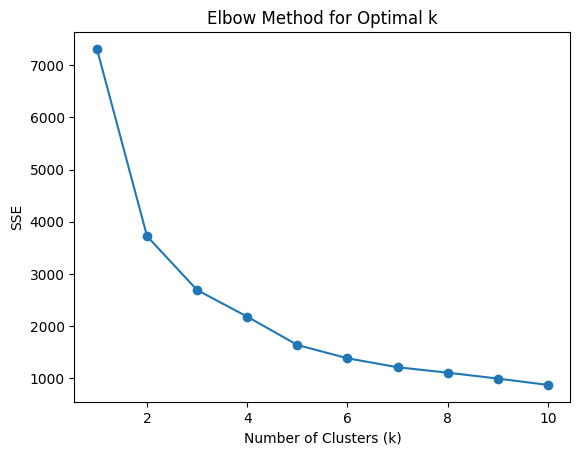

In [59]:
# Perform grid search
results = tune_k(reduced_data, k_values)

# Find the best k
best_k, best_sse = min(results, key=lambda x: x[1])
print(f"Best k: {best_k} with SSE: {best_sse}")

# Plot the results (optional)
import matplotlib.pyplot as plt
k_values, sse_values = zip(*results)
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

elbow stays the same

grid search for the best number of principal components to minimize sse.

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def grid_search_pca_kmeans(data, k_range, max_components):
    sse_values = []
    best_k = None
    best_n_components = None
    
    for k in k_range:
        for n_components in range(1, max_components + 1):
            # Perform PCA with n_components
            reduced_data, _, _ = pca(data, n_components)
            
            # Apply KMeans clustering to the reduced data and calculate SSE
            _, _, sse = kmeans(reduced_data, k=k)  # Use k from the loop
            sse_values.append((sse, k, n_components))  # Store SSE, k, and n_components
            
    # Find the combination with the minimal SSE
    min_sse, best_k, best_n_components = min(sse_values, key=lambda x: x[0])  # x[0] is the SSE value
    
    print(f"The minimal SSE is {min_sse} with k={best_k} clusters and {best_n_components} PCA components.")
    
    # Prepare data for plotting
    sse_list, k_list, n_components_list = zip(*sse_values)
    
    # Create 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(k_list, n_components_list, sse_list, c=sse_list, cmap='viridis')

    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Number of PCA Components')
    ax.set_zlabel('SSE')

    plt.title('SSE vs. Number of Clusters and PCA Components')
    plt.show()
    
    return min_sse, best_k, best_n_components




The minimal SSE is 85.12657897819241 with k=10 clusters and 1 PCA components.


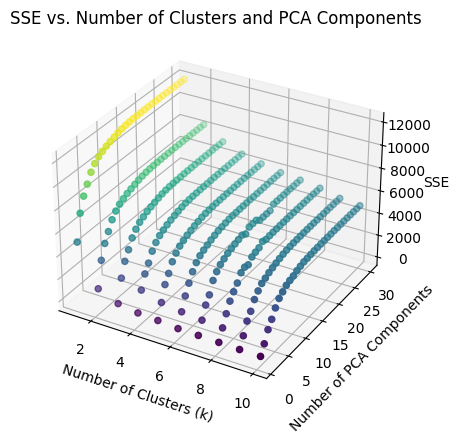

In [71]:
# Example usage
k_range = range(1, 11)
max_components = 30
min_sse, best_k, best_n_components = grid_search_pca_kmeans(data_scaled.values, k_range=k_range, max_components=max_components)


In [68]:
k_range=range(1,11)
max_components=30
min_sse,best_k,corresponding_pca=grid_search_pca_kmeans(data_scaled.values,k_range=k_range,max_components=max_components)


The minimal SSE is 85.12657897819241 with k=10 clusters and 1 PCA components.


## comparing against the tru label

 adjusted kmeans


In [83]:
import numpy as np

def adjusted_kmeans(data, k, max_iter=100, tol=1e-4):
    # Step 1: Randomly initialize centroids
    np.random.seed(42)
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[random_indices]
    
    for i in range(max_iter):
        # Step 2: Assign points to nearest centroid
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)  # Corrected distance calculation
        labels = np.argmin(distances, axis=1)
        
        # Step 3: Recalculate centroids
        new_centroids = np.array([data[labels == j].mean(axis=0) if len(data[labels == j]) > 0 else data[np.random.choice(data.shape[0])] for j in range(k)])
        
        # Check for convergence (using tolerance)
        if np.all(np.abs(centroids - new_centroids) < tol):
            break
        centroids = new_centroids
    
    # Compute SSE (Sum of Squared Errors)
    sse = np.sum((data - centroids[labels]) ** 2)
    
    return labels, centroids, sse


In [87]:
print(f"Data shape: {data_scaled.shape}")
print(f"Labels shape: {labels.shape}")


Data shape: (398, 30)
Labels shape: (398,)


In [108]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, accuracy_score
import matplotlib.pyplot as plt

# Function to map predicted clusters to true labels
def map_clusters_to_labels(pred_labels, true_labels):
    mapped_labels = np.zeros_like(pred_labels)
    for i in np.unique(pred_labels):
        # Get indices of samples in the current cluster
        cluster_indices = np.where(pred_labels == i)[0]
        # Find the majority label in this cluster
        if len(cluster_indices) > 0:
            majority_label = np.argmax(np.bincount(true_labels[cluster_indices]))
            mapped_labels[cluster_indices] = majority_label
    return mapped_labels

def grid_search_pca_kmeans(X, true_labels, n_components_list, k_list):
    results = []  # Store results for each combination of n_components and k
    
    for n_components in n_components_list:
        # Perform PCA using your custom function
        X_reduced, _, _ = pca(X, n_components)
        
        for k in k_list:
            # Perform K-means clustering (assuming adjusted_kmeans is defined)
            predicted_labels, _, _ = adjusted_kmeans(X_reduced, k=k)
            
            # Map clusters to true labels
            mapped_labels = map_clusters_to_labels(predicted_labels, true_labels)
            
            # Compute ARI and accuracy
            ari = adjusted_rand_score(true_labels, mapped_labels)
            accuracy = accuracy_score(true_labels, mapped_labels)
            
            # Append results
            results.append((n_components, k, ari, accuracy))
            print(f"PCA Components: {n_components}, K: {k}, ARI: {ari:.4f}, Accuracy: {accuracy:.4f}")
    
    # Find the best configuration based on accuracy
    best_n_components, best_k, best_ari, best_accuracy = max(results, key=lambda x: x[3])
    
    return best_n_components, best_k, best_ari, best_accuracy, results


In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, accuracy_score

def grid_search_pca_kmeans(X, true_labels, n_components_list, k_list):
    results = []  # Store results for each combination of n_components and k
    
    for n_components in n_components_list:
        # Perform PCA using your custom function
        X_reduced, _, _ = pca(X, n_components)  # Custom PCA function
        
        for k in k_list:
            # Perform K-means clustering (assuming adjusted_kmeans is defined)
            predicted_labels, _, _ = adjusted_kmeans(X_reduced, k=k)
            
            # Map clusters to true labels
            mapped_labels = map_clusters_to_labels(predicted_labels, true_labels)
            
            # Compute ARI and accuracy
            ari = adjusted_rand_score(true_labels, mapped_labels)
            accuracy = accuracy_score(true_labels, mapped_labels)
            
            # Append results
            results.append((n_components, k, ari, accuracy))
            print(f"PCA Components: {n_components}, K: {k}, ARI: {ari:.4f}, Accuracy: {accuracy:.4f}")
    
    # Find the best configuration based on accuracy
    best_n_components, best_k, best_ari, best_accuracy = max(results, key=lambda x: x[3])
    
    # Perform PCA for the best configuration
    X_reduced_best, _, _ = pca(X, best_n_components)  # Custom PCA function
    
    # Plot the most accurate PCA (using the best number of components)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced_best[:, 0], X_reduced_best[:, 1], c=true_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(label='True Labels')
    plt.title(f"Best PCA: {best_n_components} Components, K={best_k} Clusters (Accuracy: {best_accuracy:.4f})")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()
    
    return best_n_components, best_k, best_ari, best_accuracy, results


PCA Components: 1, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 1, K: 3, ARI: 0.6431, Accuracy: 0.9121
PCA Components: 1, K: 4, ARI: 0.6092, Accuracy: 0.9045
PCA Components: 1, K: 5, ARI: 0.5759, Accuracy: 0.8970
PCA Components: 2, K: 2, ARI: 0.7169, Accuracy: 0.9296
PCA Components: 2, K: 3, ARI: 0.6579, Accuracy: 0.9171
PCA Components: 2, K: 4, ARI: 0.5960, Accuracy: 0.9020
PCA Components: 2, K: 5, ARI: 0.5982, Accuracy: 0.8970
PCA Components: 3, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 3, K: 3, ARI: 0.6893, Accuracy: 0.9246
PCA Components: 3, K: 4, ARI: 0.6107, Accuracy: 0.9045
PCA Components: 3, K: 5, ARI: 0.6233, Accuracy: 0.9020
PCA Components: 4, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 4, K: 3, ARI: 0.6692, Accuracy: 0.9196
PCA Components: 4, K: 4, ARI: 0.6045, Accuracy: 0.9045
PCA Components: 4, K: 5, ARI: 0.5943, Accuracy: 0.9020
PCA Components: 5, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 5, K: 3, ARI: 0.6692, Accuracy: 0.9196
PCA Compon

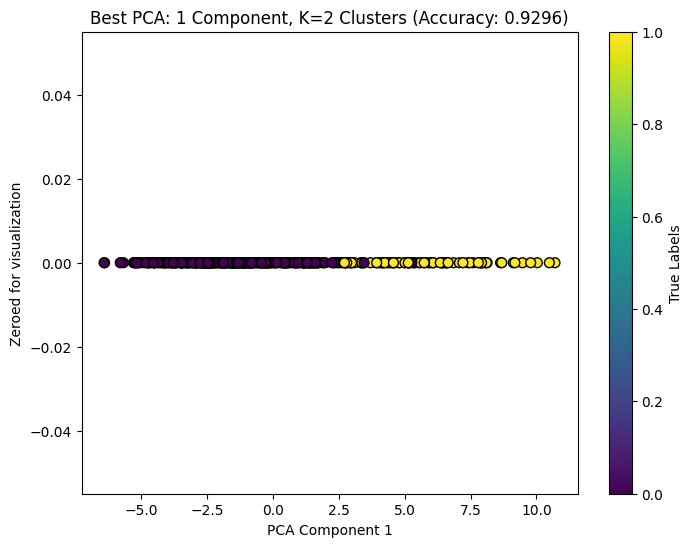

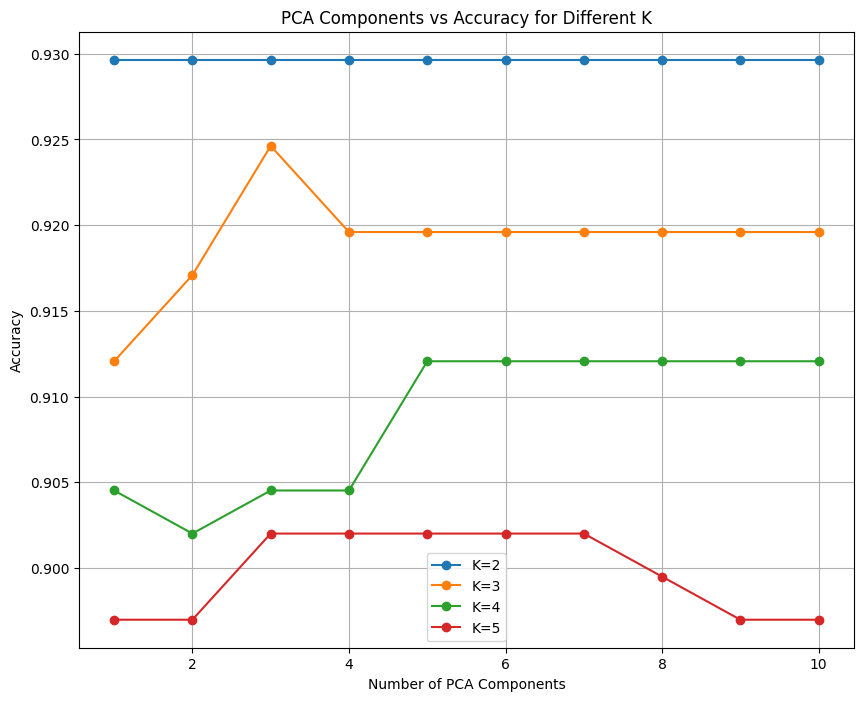


Summary of Results:
PCA Components: 1, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 1, K: 3, ARI: 0.6431, Accuracy: 0.9121
PCA Components: 1, K: 4, ARI: 0.6092, Accuracy: 0.9045
PCA Components: 1, K: 5, ARI: 0.5759, Accuracy: 0.8970
PCA Components: 2, K: 2, ARI: 0.7169, Accuracy: 0.9296
PCA Components: 2, K: 3, ARI: 0.6579, Accuracy: 0.9171
PCA Components: 2, K: 4, ARI: 0.5960, Accuracy: 0.9020
PCA Components: 2, K: 5, ARI: 0.5982, Accuracy: 0.8970
PCA Components: 3, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 3, K: 3, ARI: 0.6893, Accuracy: 0.9246
PCA Components: 3, K: 4, ARI: 0.6107, Accuracy: 0.9045
PCA Components: 3, K: 5, ARI: 0.6233, Accuracy: 0.9020
PCA Components: 4, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 4, K: 3, ARI: 0.6692, Accuracy: 0.9196
PCA Components: 4, K: 4, ARI: 0.6045, Accuracy: 0.9045
PCA Components: 4, K: 5, ARI: 0.5943, Accuracy: 0.9020
PCA Components: 5, K: 2, ARI: 0.7178, Accuracy: 0.9296
PCA Components: 5, K: 3, ARI: 0.6692, Accura

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, accuracy_score

# Assuming this is your custom pca function
def custom_pca(X, n_components):
    # Custom PCA implementation (e.g., SVD, etc.)
    # For simplicity, we use sklearn's PCA here for illustration
    from sklearn.decomposition import PCA as sklearn_PCA
    pca = sklearn_PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    return X_reduced, pca.components_, pca.explained_variance_ratio_

def grid_search_pca_kmeans(X, true_labels, n_components_list, k_list):
    results = []  # Store results for each combination of n_components and k
    
    for n_components in n_components_list:
        # Perform PCA using your custom function
        X_reduced, _, _ = custom_pca(X, n_components)  # Using custom_pca instead of pca
        
        for k in k_list:
            # Perform K-means clustering (assuming adjusted_kmeans is defined)
            predicted_labels, _, _ = adjusted_kmeans(X_reduced, k=k)
            
            # Map clusters to true labels
            mapped_labels = map_clusters_to_labels(predicted_labels, true_labels)
            
            # Compute ARI and accuracy
            ari = adjusted_rand_score(true_labels, mapped_labels)
            accuracy = accuracy_score(true_labels, mapped_labels)
            
            # Append results
            results.append((n_components, k, ari, accuracy))
            print(f"PCA Components: {n_components}, K: {k}, ARI: {ari:.4f}, Accuracy: {accuracy:.4f}")
    
    # Find the best configuration based on accuracy
    best_n_components, best_k, best_ari, best_accuracy = max(results, key=lambda x: x[3])
    
    # Perform PCA for the best configuration
    X_reduced_best, _, _ = custom_pca(X, best_n_components)  # Using custom_pca instead of pca
    
    # Plot the most accurate PCA (using the best number of components)
    plt.figure(figsize=(8, 6))
    
    if best_n_components == 1:
        # If we have only one component, plot in 1D
        plt.scatter(X_reduced_best, np.zeros_like(X_reduced_best), c=true_labels, cmap='viridis', edgecolor='k', s=50)
        plt.title(f"Best PCA: {best_n_components} Component, K={best_k} Clusters (Accuracy: {best_accuracy:.4f})")
        plt.xlabel('PCA Component 1')
        plt.ylabel('Zeroed for visualization')
    else:
        # If we have two components, plot in 2D
        plt.scatter(X_reduced_best[:, 0], X_reduced_best[:, 1], c=true_labels, cmap='viridis', edgecolor='k', s=50)
        plt.title(f"Best PCA: {best_n_components} Components, K={best_k} Clusters (Accuracy: {best_accuracy:.4f})")
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
    
    plt.colorbar(label='True Labels')
    plt.show()
    
    return best_n_components, best_k, best_ari, best_accuracy, results

# Example usage
n_components_list = range(1, 11)  # Test PCA components from 1 to 10
k_list = range(2, 6)  # Test K values from 2 to 5

best_n_components, best_k, best_ari, best_accuracy, results = grid_search_pca_kmeans(data_scaled.values, true_labels, n_components_list, k_list)

# Extract results for plotting
results_array = np.array(results)
components = results_array[:, 0].astype(int)
ks = results_array[:, 1].astype(int)
accuracies = results_array[:, 3].astype(float)

# Plot heatmap of accuracy for PCA components vs. number of clusters (k)
plt.figure(figsize=(10, 8))
for k in k_list:
    plt.plot(
        components[ks == k], 
        accuracies[ks == k], 
        marker='o', 
        linestyle='-', 
        label=f'K={k}'
    )

plt.title('PCA Components vs Accuracy for Different K')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print("\nSummary of Results:")
for n_components, k, ari, accuracy in results:
    print(f"PCA Components: {n_components}, K: {k}, ARI: {ari:.4f}, Accuracy: {accuracy:.4f}")

print(f"\nBest Configuration:")
print(f"Best number of PCA components: {best_n_components}")
print(f"Best number of clusters (K): {best_k}")
print(f"Best ARI: {best_ari:.4f}")
print(f"Best Accuracy: {best_accuracy:.4f}")


In [73]:
reduced_data, _, _ = pca(data_scaled.values, n_components=2)
labels, pca_centroids, sse = kmeans(reduced_data, k=2)
print(f"SSE after PCA: {sse}")

SSE after PCA: 3721.2368153789084


Visualizing clusters for PCA-reduced data

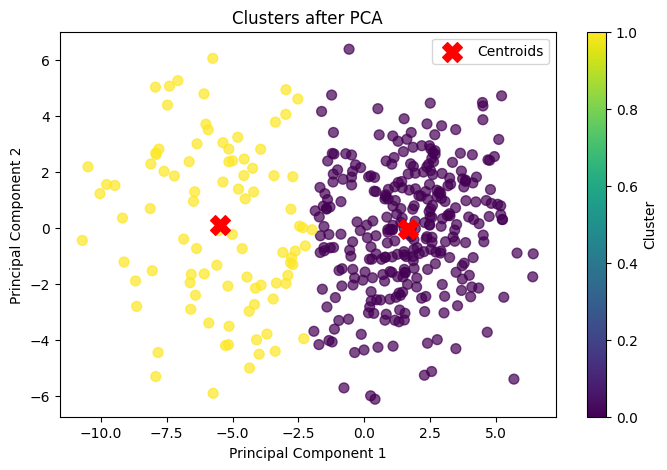

In [51]:


visualize_clusters(reduced_data, labels, "Clusters after PCA",centroids=pca_centroids)

Validating with scikit-learn

a:\pycharm\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "a:\pycharm\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "a:\pycharm\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "a:\pycharm\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "a:\pycharm\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


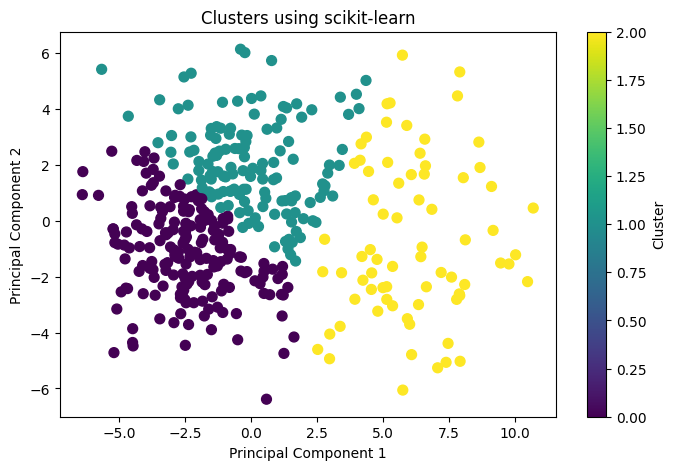

In [22]:
# PCA using scikit-learn
pca_model = PCA(n_components=2)
data_reduced = pca_model.fit_transform(data_scaled)

# K-Means using scikit-learn
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(data_reduced)
sklearn_labels = kmeans_model.labels_

# Visualize results
visualize_clusters(data_reduced, sklearn_labels, "Clusters using scikit-learn")
